Set Data path

In [177]:
dataCSV=[
    "../All_Data/20220408拿放資料/手2022-04-08 134400-4.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 134600-5.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 134800-4.csv",
    
    "../All_Data/20220408拿放資料/手2022-04-08 135200-2.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 135400-5.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 135600-2.csv",
    
    "../All_Data/20220408拿放資料/手2022-04-08 135900-6.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 140200-3.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 141000-5.csv",
    
    "../All_Data/20220408拿放資料/手2022-04-08 141200-5.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 141500-6.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 141600-3.csv",
    
    "../All_Data/20220408拿放資料/手2022-04-08 141800-4.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 142200-6.csv",
    "../All_Data/20220408拿放資料/手2022-04-08 142500-6.csv",
    #
    
    "../All_Data/20220408拿放資料/腳2022-04-08 134400-4.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 134600-5.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 134800-4.csv",
    
    "../All_Data/20220408拿放資料/腳2022-04-08 135200-2.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 135400-5.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 135600-2.csv",
    
    "../All_Data/20220408拿放資料/腳2022-04-08 135900-6.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 140200-3.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 141000-5.csv",
    
    "../All_Data/20220408拿放資料/腳2022-04-08 141200-5.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 141500-6.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 141600-3.csv",
    
    "../All_Data/20220408拿放資料/腳2022-04-08 141800-4.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 142200-6.csv",
    "../All_Data/20220408拿放資料/腳2022-04-08 142500-6.csv",
    
]

Set file Name

In [178]:
fileName=[]
for i in range(len(dataCSV)):
    newFilename = dataCSV[i].split('/')
    fileName.append(newFilename[len(newFilename)-1][0:len(newFilename[len(newFilename)-1])-4])

Pre-processing

In [179]:
def preProcessing(data):
    for i in range(len(data[:,14])-1,-1,-1):
        data[i,14]=data[i,14]-data[0,14]
    return data
    


Smooth by d by difference window

In [180]:
def smooth(data,d):
    if(d == 0 ):
        return np.array(data)
    newData=[]
    TimeList= data[:,14]

    for i in range (0,len(data[:,0])-d+1):
        tempJ=[]
        # print(TimeList[i])
        for j in range(0,len(data[0])-1):
            tempK=0
            for k in range(d):
                # print(data[i+k][j])
                tempK += data[i+k][j]
                # print("tempK = " + str(tempK))
            tempJ.append(tempK/d)
            
            # print(len(tempJ))
            # print(tempJ)
        tempJ.append(TimeList[i])
        newData.append(tempJ)
    return np.array(newData)
    
def dowmsmooth(data,d):
    if(d == 0 ):
        return np.array(data)
    newData=[]
    for i in range (0,len(data[:,0])-d+1,d):
        tempJ=[]
        for j in range(0,15):
            tempK=0
            for k in range(d):
                # print(data[i+k][j])
                tempK += data[i+k][j]
                # print("tempK = " + str(tempK))
            tempJ.append(tempK/d)
            # print(tempJ)
        newData.append(tempJ)
    return np.array(newData)



Plot and draw

In [181]:
def QuickPlot(i):
    line=["Xg","Yg","Zg","Xm","Ym","Zm","Xa","Ya","Za","Xq","Yq","Zq","direc"]
    colorSet=['r','g','b','y']
    if(i!=13):
        plt.plot(data[:,14], data[: , i], color = colorSet[i%3], label = line[i-1])
    else:
        plt.plot(data[:,14], data[: , i], color = colorSet[3], label = line[i-1])
    
def draw(data,index):

    line=["g","m","a","q"]
    titleDictionary=["hands","foot"]
    for i in range(0,10,3):
        plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
        plt.xlabel("time", fontsize = 40, labelpad = 20)
        plt.xticks(fontsize = 30)
        plt.yticks(fontsize = 30)
        plt.title(fileName[index][1:]+" "+titleDictionary[index//(len(dataCSV)//2)],fontsize = 30) 
        QuickPlot(i+1)
        QuickPlot(i+2)
        QuickPlot(i+3)
        if(i==9):
            QuickPlot(i+4)
        plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
        plt.savefig( path+'/'+ fileName[index]+'_'+ line[i//3]+'.png')
        plt.show()

def drawfft(data,index):
    line=["Xg","Yg","Zg","Xm","Ym","Zm","Xa","Ya","Za","Xq","Yq","Zq","direc"]
    colorSet=['r','g','b','y']
    titleDictionary=["hands","foot"]
    for i in range (len(line)):
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel('Time',fontsize = 10)
        # plt.xticks(data[:,14])
        plt.title(str(line[i])+' transfrom'+titleDictionary[index//(len(dataCSV)//2)],fontsize = 10) 
        plt.specgram(data[:,1+i],Fs=1,NFFT=18,noverlap=17,cmap='plasma',xextent=(0,data[len(data[:,0])-1][14]))
        
        plt.savefig(path+'/'+ fileName[index]+'_'+ line[i]+'.pdf')
        plt.show()

Make file

In [182]:
import os
def mkdir(path):
    #判斷目錄是否存在
    #存在：True
    #不存在：False
    folder = os.path.exists(path)

    #判斷結果
    if not folder:
        #如果不存在，則建立新目錄
        os.makedirs(path)
        print('-----建立成功-----')

    else:
        #如果目錄已存在，則不建立，提示目錄已存在
        print(path+'目錄已存在')


image/2022-04-08 134400-4 smooth by 3目錄已存在


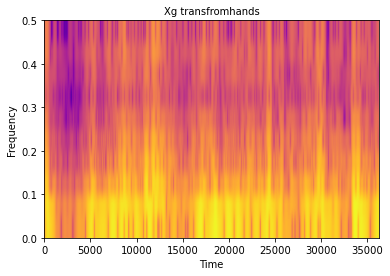

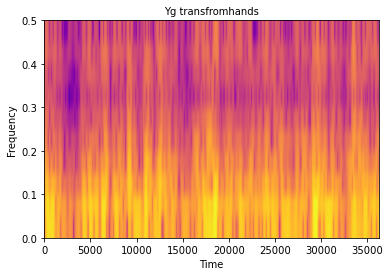

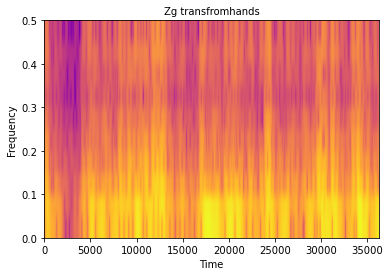

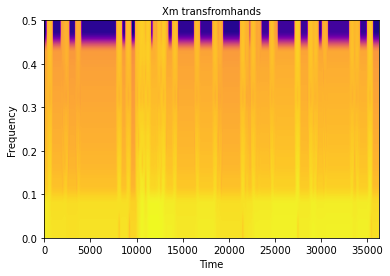

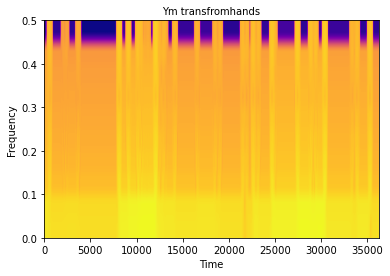

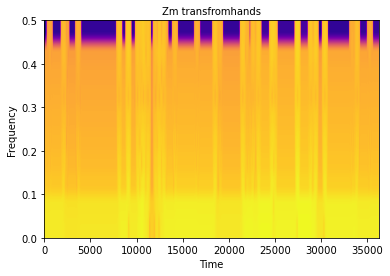

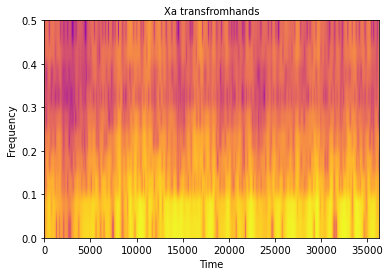

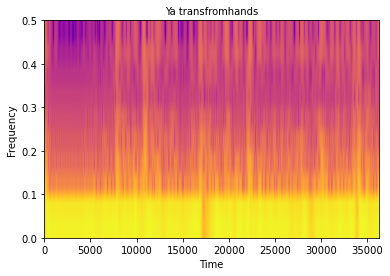

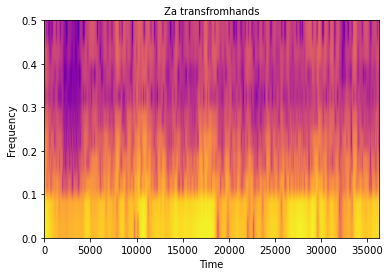

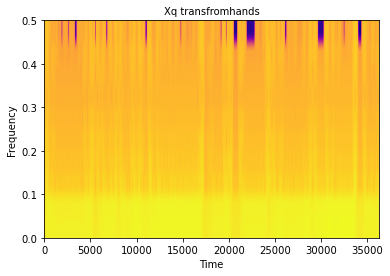

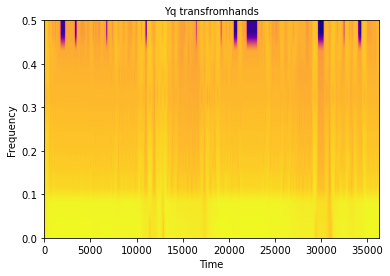

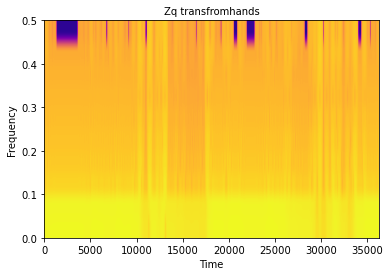

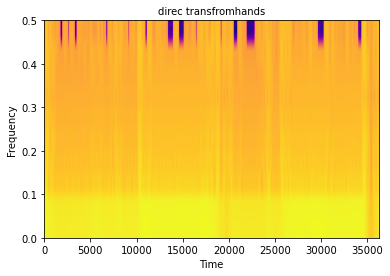

In [184]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

# index=0

# common_ratio=3
# data = pd.read_csv(dataCSV[index])
# data = np.array(data)

# if (common_ratio > 0):
#     path = 'image/' + fileName[index][1:] + " smooth by " +str(common_ratio)
# else:
#     path = 'image/' + fileName[index][1:]
# mkdir(path)
# data = preProcessing(data)

# data = smooth(data,common_ratio)

# # draw(data,index)
# drawfft(data,index)   


# this can run more
index=0
for index in range (len(dataCSV)):
    common_ratio=3
    data = pd.read_csv(dataCSV[index])
    data = np.array(data)

    if (common_ratio > 0):
        path = 'image/' + fileName[index][1:] + " smooth by " +str(common_ratio)
    else:
        path = 'image/' + fileName[index][1:]
    mkdir(path)
    data = preProcessing(data)

    data = smooth(data,common_ratio)

    # draw(data,index)
    drawfft(data,index)   

